In [19]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm
import math

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
import matplotlib.patches as patches

In [20]:
ctx = straxbra.XebraContext()

In [21]:
run = '00159'
peaks_data = ctx.get_array(run, 'peaks')

In [22]:
waveform = peaks_data['data']
integral = peaks_data['area']
width = peaks_data['width'][:,5]
timestamp = peaks_data['time']
area_per_channel = peaks_data['area_per_channel']
risetime = -peaks_data['area_decile_from_midpoint'][:,1]

In [23]:
def CutCondition(waveform):  
    FirstPeak_area = sum(waveform[:15])
    SecondPeak_area = sum(waveform[15:])    
    if  FirstPeak_area > 100 and FirstPeak_area < 600 and SecondPeak_area > 40 and SecondPeak_area  < 200: 
        return(True)
    else:
        return(False)

In [24]:
def S2_found(integral, width):
    if integral > 500 and width >200 and width < 2000:
        return True
    else:
        return False

In [25]:
def Sum(area_per_channel):
    PMT_sum = 0.5*sum(area_per_channel[1:8])
    return PMT_sum

In [26]:
# def PrintWaveform(waveform):
    
#     fig, ax1 = plt.subplots(sharex=False, figsize=(12, 3.5))
#     ax1.plot(waveform)
#     plt.show()

def PrintWaveform(waveform,i):
    
    fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7,sharex=False, figsize=(30, 5))
    ax1.plot(waveform[i])
    ax2.plot(waveform[i+1])
    ax3.plot(waveform[i+2])
    ax4.plot(waveform[i+3])
    ax5.plot(waveform[i+4])
    ax6.plot(waveform[i+5])
    ax7.plot(waveform[i+6])
    plt.show()

In [27]:
def Process(waveform,i):

    CutFlag = CutCondition(waveform[i])
    if CutFlag == True:
        j = 1
        counter_timestamp = timestamp[i+j]
        threshold_timestamp = timestamp[i] + 55000
        while threshold_timestamp >= counter_timestamp and S2_found(integral = integral[i+j], width = width[i+j]) == False: 
            j += 1
            counter_timestamp = timestamp[i+j]           
        else:
            if S2_found(integral = integral[i+j], width = width[i+j]):
#                 PrintWaveform(waveform,i)
                #PrintWaveform(waveform[i+j])
                kr_s2_area.append(integral[i+j])
                kr_s2_width.append(width[i+j])
                kr_s2_risetime.append(risetime[i+j])
                for k in range(len(PMT_area_list)):
                    if area_per_channel[i+j][1] > 0 and area_per_channel[i+j][2] > 0 \
                    and area_per_channel[i+j][3] > 0 and area_per_channel[i+j][4] > 0 \
                    and area_per_channel[i+j][5] > 0 and area_per_channel[i+j][6] > 0 \
                    and area_per_channel[i+j][7] > 0 \
                    :
                        PMT_area_list[k].append(area_per_channel[i+j][k+1])
                for n in range(len(PMT_50percent_width_list)):                    
                    if area_per_channel[i+j][n+1] > Sum(area_per_channel[i+j]) and area_per_channel[i+j][1] > 0 \
                    and area_per_channel[i+j][2] > 0 \
                    and area_per_channel[i+j][3] > 0 and area_per_channel[i+j][4] > 0 \
                    and area_per_channel[i+j][5] > 0 and area_per_channel[i+j][6] > 0 \
                    and area_per_channel[i+j][7] > 0 \
                    :
                        PMT_50percent_width_list[n].append((width[i+j]))

In [28]:
PMTs_all_runs = {}
PMTs_50percent_all_runs = {}

Width_50percent_PMT1 = []
Width_50percent_PMT2 = []
Width_50percent_PMT3 = []
Width_50percent_PMT4 = []
Width_50percent_PMT5 = []
Width_50percent_PMT6 = []
Width_50percent_PMT7 = []
Area_s2_PMT1 = []
Area_s2_PMT2 = []
Area_s2_PMT3 = []
Area_s2_PMT4 = []
Area_s2_PMT5 = []
Area_s2_PMT6 = []
Area_s2_PMT7 = []

kr_s2_area = []
kr_s2_width = []
kr_s2_risetime = []

PMT_area_list = [Area_s2_PMT1, Area_s2_PMT2,Area_s2_PMT3,Area_s2_PMT4,Area_s2_PMT5,Area_s2_PMT6,Area_s2_PMT7]
PMT_50percent_width_list = [Width_50percent_PMT1,Width_50percent_PMT2,Width_50percent_PMT3,Width_50percent_PMT4,Width_50percent_PMT5,Width_50percent_PMT6,Width_50percent_PMT7]

for i in range(0,len(waveform)):
    
    Process(waveform,i)   
    

PMTs_all_runs.update({run:PMT_area_list})
PMTs_50percent_all_runs.update({run:PMT_50percent_width_list})


In [29]:
def single_gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(x-mu)**2         /(2*sigma**2))
    return gaus

n1, binEdges1 = np.histogram(PMTs_50percent_all_runs[run][0], bins=np.linspace(200,1500,20))
n4, binEdges4 = np.histogram(PMTs_50percent_all_runs[run][3], bins=np.linspace(200,1500,20))
n2, binEdges2 = np.histogram(PMTs_50percent_all_runs[run][1], bins=np.linspace(200,1500,20))
n5, binEdges5 = np.histogram(PMTs_50percent_all_runs[run][4], bins=np.linspace(200,1500,20))
n3, binEdges3 = np.histogram(PMTs_50percent_all_runs[run][2], bins=np.linspace(200,1500,20))
n6, binEdges6 = np.histogram(PMTs_50percent_all_runs[run][5], bins=np.linspace(200,1500,20))
n7, binEdges7 = np.histogram(PMTs_50percent_all_runs[run][6], bins=np.linspace(200,1500,20))
bincenters1 = 0.5 * (binEdges1[1:] + binEdges1[:-1])
bincenters4 = 0.5 * (binEdges4[1:] + binEdges4[:-1])
bincenters2 = 0.5 * (binEdges2[1:] + binEdges2[:-1])
bincenters5 = 0.5 * (binEdges5[1:] + binEdges5[:-1])
bincenters3 = 0.5 * (binEdges3[1:] + binEdges3[:-1])
bincenters6 = 0.5 * (binEdges6[1:] + binEdges6[:-1])
bincenters7 = 0.5 * (binEdges7[1:] + binEdges7[:-1])
p0 =[10,700,200]
bounds = ((10, 300,50),(np.inf, 1500,np.inf ))

x_range = np.linspace(0,1500,100)

popt1, pcov1 = curve_fit(single_gaus, bincenters1, n1, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n1), np.ones_like(n1)))
popt4, pcov4 = curve_fit(single_gaus, bincenters4, n4, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n4), np.ones_like(n4)))
popt2, pcov2 = curve_fit(single_gaus, bincenters2, n2, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n2), np.ones_like(n2)))
popt5, pcov5 = curve_fit(single_gaus, bincenters5, n5, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n5), np.ones_like(n5)))
popt3, pcov3 = curve_fit(single_gaus, bincenters3, n3, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n3), np.ones_like(n3)))
popt6, pcov6 = curve_fit(single_gaus, bincenters6, n6, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n6), np.ones_like(n6)))
popt7, pcov7 = curve_fit(single_gaus, bincenters7, n7, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n7), np.ones_like(n7)))
perr1 = np.sqrt(np.diag(pcov1))
perr2 = np.sqrt(np.diag(pcov2))
perr3 = np.sqrt(np.diag(pcov3))
perr4 = np.sqrt(np.diag(pcov4))
perr5 = np.sqrt(np.diag(pcov5))
perr6 = np.sqrt(np.diag(pcov6))
perr7 = np.sqrt(np.diag(pcov7))

PlotFlag = False
ArrowFlag = True

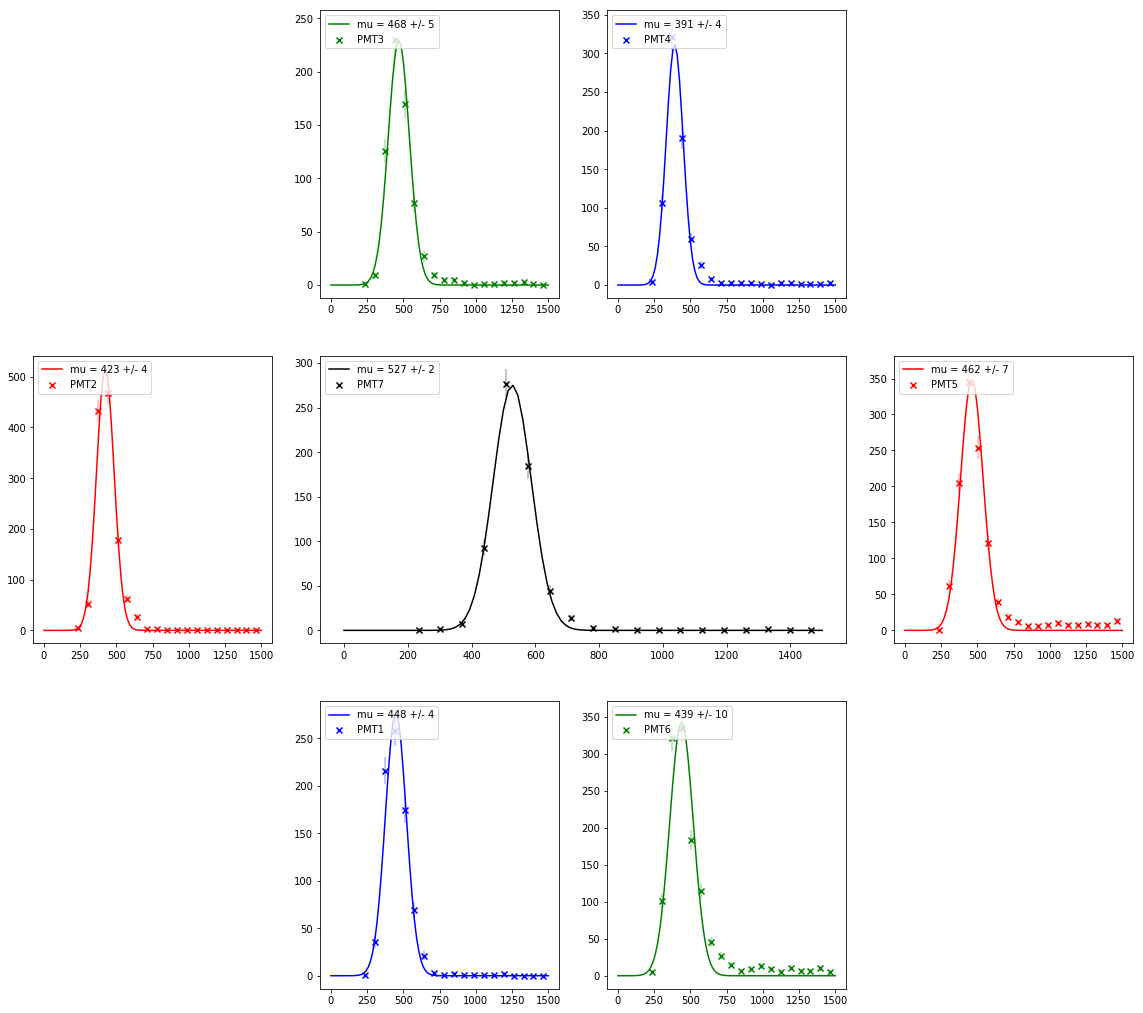

centroid14:  0.067
centroid25:  -0.044
centroid36:  0.032


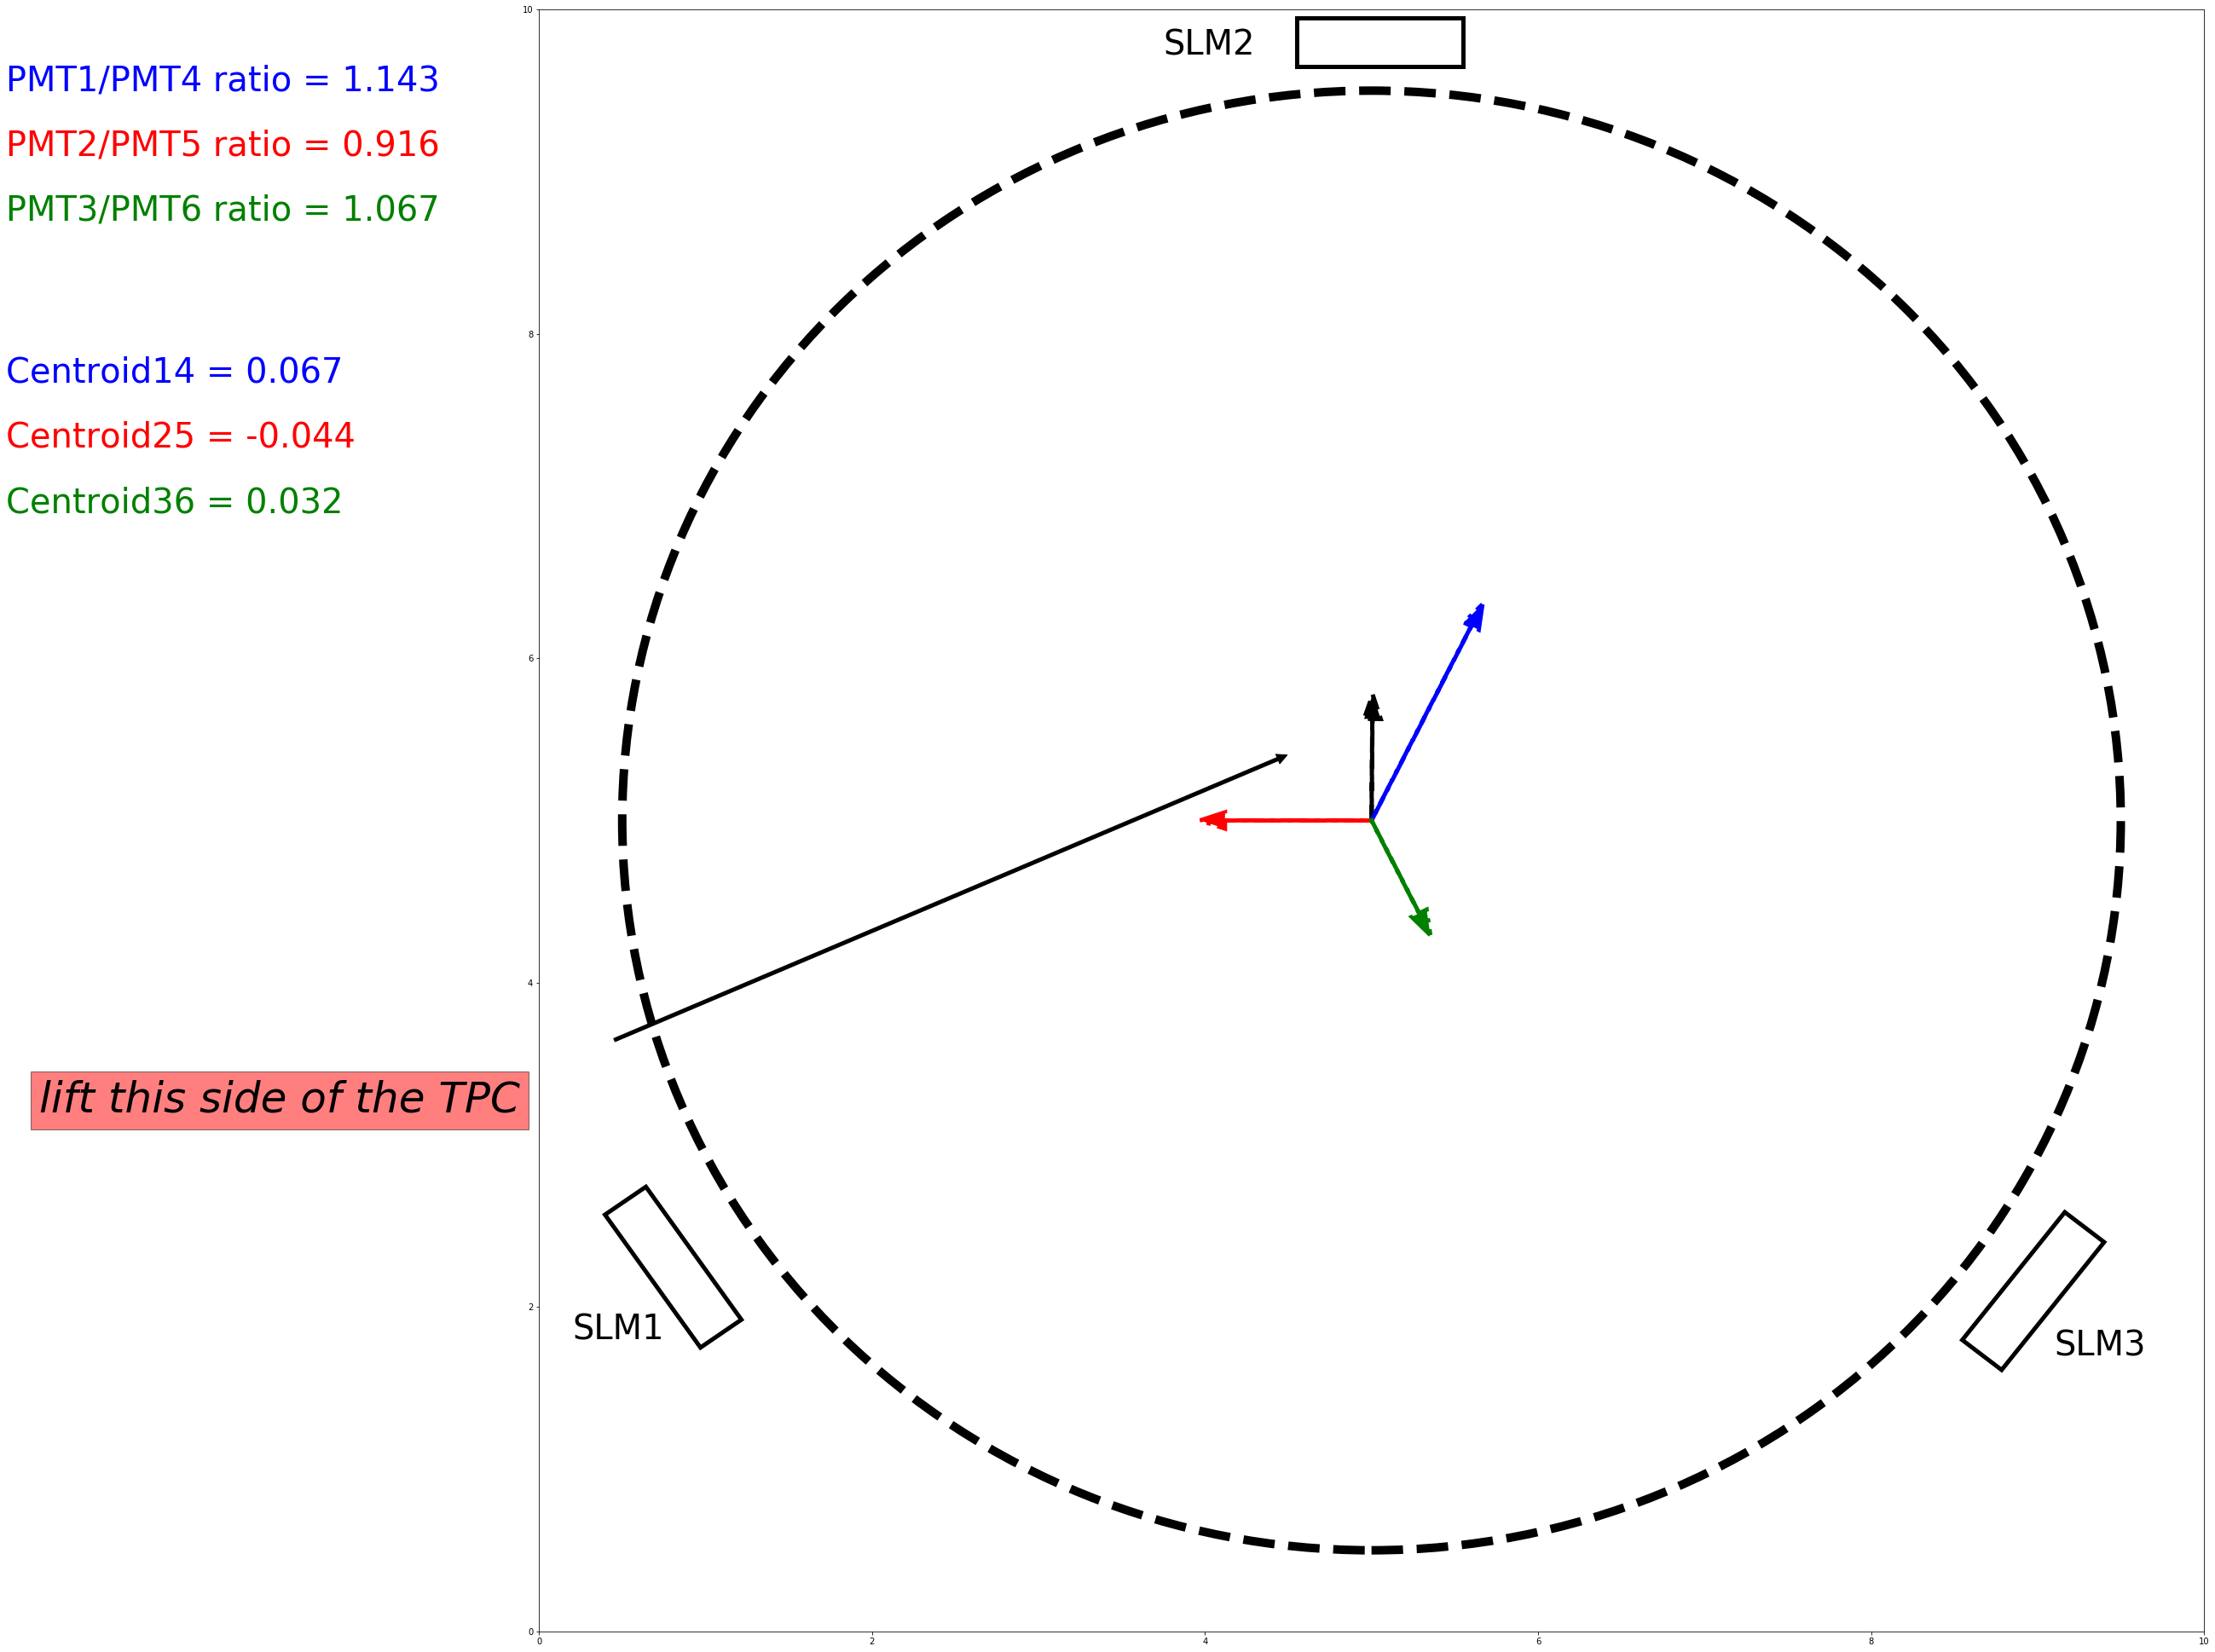

In [30]:

plt.figure(figsize=(30, 18))

G = gridspec.GridSpec(3, 6)

axes_1 = plt.subplot(G[2, 2])
axes_1.scatter(bincenters1, n1, c ='b', marker = 'x', label = 'PMT1')
axes_1.plot(x_range,single_gaus(x_range,*popt1), color = 'blue', label ='mu = '+str(int(popt1[1]))+' +/- '+str(int(perr1[1])))
axes_1.legend(prop={'size': 10}, loc = 'upper left')
axes_1.errorbar(bincenters1, n1, yerr=np.sqrt(n1), ecolor='blue', marker= '.', mec='blue', mfc= 'blue', alpha = 0.3, linestyle='None')

axes_2 =plt.subplot(G[1,1])
axes_2.scatter(bincenters2, n2, c='r', marker = 'x', label = 'PMT2')
axes_2.plot(x_range, single_gaus(x_range, *popt2), color = 'red', label ='mu = '+str(int(popt2[1]))+' +/- '+str(int(perr2[1])))
axes_2.legend(prop={'size': 10}, loc = 'upper left')
axes_2.errorbar(bincenters2, n2, yerr=np.sqrt(n2), ecolor='red', marker= '.', mec='red', mfc= 'red', alpha = 0.3, linestyle='None')

axes_3 = plt.subplot(G[0, 2])
axes_3.scatter(bincenters3, n3, c = 'g', marker = 'x', label = 'PMT3')
axes_3.plot(x_range, single_gaus(x_range,*popt3), color = 'green', label ='mu = '+str(int(popt3[1]))+' +/- '+str(int(perr3[1])))
axes_3.legend(prop={'size': 10}, loc = 'upper left')
axes_3.errorbar(bincenters3, n3, yerr=np.sqrt(n3), ecolor='green', marker= '.', mec='green', mfc= 'green', alpha = 0.3, linestyle='None')

axes_4= plt.subplot(G[0, 3])
axes_4.scatter(bincenters4, n4, c ='b', marker = 'x', label = 'PMT4')
axes_4.plot(x_range,single_gaus(x_range,*popt4), color = 'blue', label ='mu = '+str(int(popt4[1]))+' +/- '+str(int(perr4[1])))
axes_4.legend(prop={'size': 10}, loc = 'upper left')
axes_4.errorbar(bincenters4, n4, yerr=np.sqrt(n4), ecolor='blue', marker= '.', mec='blue', mfc= 'blue', alpha = 0.3, linestyle='None')

axes_5 = plt.subplot(G[1,4])
axes_5.scatter(bincenters5, n5, c='r', marker = 'x', label = 'PMT5')
axes_5.plot(x_range, single_gaus(x_range, *popt5), color = 'red', label ='mu = '+str(int(popt5[1]))+' +/- '+str(int(perr5[1])))
axes_5.legend(prop={'size': 10}, loc = 'upper left')
axes_5.errorbar(bincenters5, n5, yerr=np.sqrt(n5), ecolor='red', marker= '.', mec='red', mfc= 'red', alpha = 0.3, linestyle='None')

axes_6 = plt.subplot(G[2,3])
axes_6.scatter(bincenters6, n6, c = 'g', marker = 'x', label = 'PMT6' )
axes_6.plot(x_range, single_gaus(x_range, *popt6), color = 'green', label ='mu = '+str(int(popt6[1]))+' +/- '+str(int(perr6[1])))
axes_6.legend(prop={'size': 10}, loc = 'upper left')
axes_6.errorbar(bincenters6, n6, yerr=np.sqrt(n6), ecolor='green', marker= '.', mec='green', mfc= 'green', alpha = 0.3, linestyle='None')

axes_7 =plt.subplot(G[1, 2:4])
axes_7.scatter(bincenters7, n7, c = 'black', marker = 'x', label = 'PMT7' )
axes_7.plot(x_range, single_gaus(x_range, *popt7), color = 'black', label ='mu = '+str(int(popt7[1]))+' +/- '+str(int(perr7[1])))
axes_7.legend(prop={'size': 10}, loc = 'upper left')
axes_7.errorbar(bincenters7, n7, yerr=np.sqrt(n7), ecolor='black', marker= '.', mec='black', mfc= 'black', alpha = 0.3, linestyle='None')

plt.show()





fig, ax0 = plt.subplots(figsize=(35, 35))

Ratio1_4 = popt1[1]/popt4[1]
Ratio2_5 = popt2[1]/popt5[1]
Ratio3_6 = popt3[1]/popt6[1]
Ratio1_4 = str("%0.3f" % Ratio1_4)
Ratio2_5 = str("%0.3f" % Ratio2_5)
Ratio3_6 = str("%0.3f" % Ratio3_6)


reflector  = plt.Circle((5, 5), 4.5, color='black',linestyle ='--', linewidth='10', fill = False)
left1, bottom1, width1, height1 = [0.29, 0.15, 0.2, 0.2]
left2, bottom2, width2, height2 = [0.17, 0.4, 0.2, 0.2]
left3, bottom3, width3, height3 = [0.29, 0.65, 0.2, 0.2]
left4, bottom4, width4, height4 = [0.54, 0.65, 0.2, 0.2]
left5, bottom5, width5, height5 = [0.65, 0.4, 0.2, 0.2]
left6, bottom6, width6, height6 = [0.54, 0.15, 0.2, 0.2]
left7, bottom7, width7, height7 = [0.41, 0.4, 0.2, 0.2]
ax0.set_xlim([0,10])
ax0.set_ylim([0,10])
ax0.add_artist(reflector)


SLM1 = Rectangle((0.97, 1.75), 0.3, 1, angle=35.0, fill = False, linewidth = '5')
SLM2 = Rectangle((4.55, 9.65), 1, 0.3, angle=0, fill = False, linewidth = '5')
SLM3 = Rectangle((9.4, 2.4), 0.3, 1, angle=142.0, fill = False, linewidth = '5')
ax0.add_patch(SLM1)
ax0.add_patch(SLM2)
ax0.add_patch(SLM3)


Ratio1_4 = float(Ratio1_4)
Ratio2_5 = float(Ratio2_5)
Ratio3_6 = float(Ratio3_6)




scaling_factor =20
centroid25 = (popt2[1] - popt5[1])/(popt2[1] + popt5[1])
centroid14 = (popt1[1] - popt4[1])/(popt1[1] + popt4[1])
centroid36 = (popt3[1] - popt6[1])/(popt3[1] + popt6[1])
centroid25 = str("%0.3f" % centroid25)
centroid14 = str("%0.3f" % centroid14)
centroid36 = str("%0.3f" % centroid36)
centroid25 = float(centroid25)
centroid14 = float(centroid14)
centroid36 = float(centroid36)


vector14 = np.array([14,28])
absolute_unit14 = math.sqrt((vector14 * vector14).sum())
unit14 = vector14* 1/absolute_unit14

vector25 = np.array([28,0])
absolute_unit25 = math.sqrt((vector25 * vector25).sum())
unit25 = vector25* 1/absolute_unit25

vector36 = np.array([14,-28])
absolute_unit36 = math.sqrt((vector36 * vector36).sum())
unit36 = vector36* 1/absolute_unit36

total_centroid = (centroid25*unit25 + centroid14*unit14 + centroid36*unit36)*scaling_factor

print('centroid14: ', centroid14)
print('centroid25: ', centroid25)
print('centroid36: ', centroid36)




ax0.text(-3.2, 9.5, 'PMT1/PMT4 ratio = '+str(Ratio1_4), fontsize=40, color = 'blue')
ax0.text(-3.2, 9.1, 'PMT2/PMT5 ratio = '+str(Ratio2_5), fontsize=40, color = 'red')
ax0.text(-3.2, 8.7, 'PMT3/PMT6 ratio = '+str(Ratio3_6), fontsize=40, color = 'green')


ax0.text(-3.2, 7.7, 'Centroid14 = '+str(centroid14), fontsize=40, color = 'blue')
ax0.text(-3.2, 7.3, 'Centroid25 = '+str(centroid25), fontsize=40, color = 'red')
ax0.text(-3.2, 6.9, 'Centroid36 = '+str(centroid36), fontsize=40, color = 'green')


ax0.text(0.2, 1.8, 'SLM1', fontsize=40, color = 'black')
ax0.text(3.75, 9.72, 'SLM2', fontsize=40, color = 'black')
ax0.text(9.1, 1.7, 'SLM3', fontsize=40, color = 'black')

if PlotFlag == True:

    ax1 = fig.add_axes([left1, bottom1, width1, height1])
    ax1.scatter(bincenters1, n1, c ='b', marker = 'x', label = 'PMT1')
    ax1.plot(x_range,single_gaus(x_range,*popt1), color = 'blue', label ='mu = '+str(int(popt1[1]))+' +/- '+str(int(perr1[1])))
    ax1.legend(prop={'size': 10}, loc = 'upper left')
    ax1.errorbar(bincenters1, n1, yerr=np.sqrt(n1), ecolor='blue', marker= '.', mec='blue', mfc= 'blue', alpha = 0.3, linestyle='None')

    ax2 = fig.add_axes([left2, bottom2, width2, height2])
    ax2.scatter(bincenters2, n2, c='r', marker = 'x', label = 'PMT2')
    ax2.plot(x_range, single_gaus(x_range, *popt2), color = 'red', label ='mu = '+str(int(popt2[1]))+' +/- '+str(int(perr2[1])))
    ax2.legend(prop={'size': 10}, loc = 'upper left')
    ax2.errorbar(bincenters2, n2, yerr=np.sqrt(n2), ecolor='red', marker= '.', mec='red', mfc= 'red', alpha = 0.3, linestyle='None')

    ax3 = fig.add_axes([left3, bottom3, width3, height3])
    ax3.scatter(bincenters3, n3, c ='g', marker = 'x', label = 'PMT3')
    ax3.plot(x_range,single_gaus(x_range,*popt3), color = 'green', label ='mu = '+str(int(popt3[1]))+' +/- '+str(int(perr3[1])))
    ax3.legend(prop={'size': 10}, loc = 'upper left')
    ax3.errorbar(bincenters3, n3, yerr=np.sqrt(n3), ecolor='green', marker= '.', mec='green', mfc= 'green', alpha = 0.3, linestyle='None')

    ax4 = fig.add_axes([left4, bottom4, width4, height4])
    ax4.scatter(bincenters4, n4, c ='b', marker = 'x', label = 'PMT4')
    ax4.plot(x_range,single_gaus(x_range,*popt4), color = 'blue', label ='mu = '+str(int(popt4[1]))+' +/- '+str(int(perr4[1])))
    ax4.legend(prop={'size': 10}, loc = 'upper left')
    ax4.errorbar(bincenters4, n4, yerr=np.sqrt(n4), ecolor='blue', marker= '.', mec='blue', mfc= 'blue', alpha = 0.3, linestyle='None')

    ax5 = fig.add_axes([left5, bottom5, width5, height5])
    ax5.scatter(bincenters5, n5, c='r', marker = 'x', label = 'PMT5')
    ax5.plot(x_range, single_gaus(x_range, *popt5), color = 'red', label ='mu = '+str(int(popt5[1]))+' +/- '+str(int(perr5[1])))
    ax5.legend(prop={'size': 10}, loc = 'upper left')
    ax5.errorbar(bincenters5, n5, yerr=np.sqrt(n5), ecolor='red', marker= '.', mec='red', mfc= 'red', alpha = 0.3, linestyle='None')

    ax6 = fig.add_axes([left6, bottom6, width6, height6])
    ax6.scatter(bincenters6, n6, c = 'g', marker = 'x', label = 'PMT6' )
    ax6.plot(x_range, single_gaus(x_range, *popt6), color = 'green', label ='mu = '+str(int(popt6[1]))+' +/- '+str(int(perr6[1])))
    ax6.legend(prop={'size': 10}, loc = 'upper left')
    ax6.errorbar(bincenters6, n6, yerr=np.sqrt(n6), ecolor='green', marker= '.', mec='green', mfc= 'green', alpha = 0.3, linestyle='None')

    ax7 = fig.add_axes([left7, bottom7, width7, height7])
    ax7.scatter(bincenters7, n7, c = 'black', marker = 'x', label = 'PMT7')
    ax7.plot(x_range, single_gaus(x_range, *popt7), color = 'black', label ='mu = '+str(int(popt7[1]))+' +/- '+str(int(perr7[1])))
    ax7.legend(prop={'size': 10}, loc = 'upper left')
    ax7.errorbar(bincenters7, n7, yerr=np.sqrt(n7), ecolor='black', marker= '.', mec='black', mfc= 'black', alpha = 0.3, linestyle='None')
    
    plt.show()

if ArrowFlag == True:
    ax0.arrow(5,5, total_centroid[0], total_centroid[1], linewidth= 5, linestyle = '--', head_width=0.1, fc='k', ec='k')
    ax0.arrow(5,5 ,centroid14*unit14[0]*scaling_factor ,centroid14*unit14[1]*scaling_factor, color='blue', linewidth= 5, linestyle = '-.', head_width=0.1)
    ax0.arrow(5,5 ,centroid25*unit25[0]*scaling_factor ,centroid25*unit25[1]*scaling_factor, color='red',  linewidth= 5, linestyle = '-.', head_width=0.1)
    ax0.arrow(5,5 ,centroid36*unit36[0]*scaling_factor ,centroid36*unit36[1]*scaling_factor, color='green',linewidth= 5, linestyle = '-.', head_width=0.1)
    ax0.annotate('lift this side of the TPC', xy=(total_centroid[0]+5,total_centroid[1]+5), xytext=(-3,3.2),
                arrowprops=dict(facecolor='black', shrink=0.1),style='italic',
            bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10}, fontsize = 50, color = 'black')

    plt.show()




